# WEEK 2 - G2M insight for Cab Investment firm ( Must for all Specialization)

2 weeks time will be provided to complete this use case.

In Week2 you will be working on code piece while in 3rd week you will be working on model building (if you are planing) and presentation.

Presentation should be presented in the template provided to you in the use case and it should be professional ( remember your audience is non technical and leadership team).

Upload your presentation and code on the github or any other code repo and share the URL with us.

 

Deliverables of Week 2 are:

1. EDA Notebook,

2. Data Intake report

3. EDA recommendation and hypothesis results

 

Model building and deployment is optional.

#### Imports Libraries

In [3]:
import pandas as pd
import datetime
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

--------------

# Recommender System

In [4]:
df = pd.read_csv("df_last_one__saturday.csv")

In [5]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year,Type,Price Per KM,Profit,Age Group
0,10000011,2016-01-08,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,8,1,2016,Rain,12.182266,57.3150,25-35
1,10351127,2018-07-21,Yellow Cab,Atlanta,26.19,598.70,317.4228,29290,Cash,Male,28,10813,21,7,2018,Rain,22.859870,281.2772,25-35
2,10412921,2018-11-23,Yellow Cab,Atlanta,42.55,792.05,597.4020,29290,Card,Male,28,10813,23,11,2018,Rain,18.614571,194.6480,25-35
3,10000012,2016-01-06,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237,6,1,2016,Rain,12.526904,23.6660,25-35
4,10320494,2018-04-21,Yellow Cab,Atlanta,36.38,721.10,467.1192,27703,Card,Male,27,9237,21,4,2018,Rain,19.821330,253.9808,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317013,10439766,2018-12-31,Yellow Cab,Seattle,21.42,342.33,275.0328,36141,Card,Female,21,14944,31,12,2018,Rain,15.981793,67.2972,18-25
317014,10439790,2018-01-07,Yellow Cab,Seattle,16.66,261.18,213.9144,38520,Card,Female,42,19417,7,1,2018,Rain,15.677071,47.2656,35-45
317015,10439838,2018-01-04,Yellow Cab,Tucson,19.00,303.77,232.5600,41414,Card,Male,38,3960,4,1,2018,Rain,15.987895,71.2100,35-45
317016,10439840,2018-01-06,Yellow Cab,Tucson,5.60,92.42,70.5600,41677,Cash,Male,23,19454,6,1,2018,Rain,16.503571,21.8600,18-25


-----------------

## How are companies by earnings?

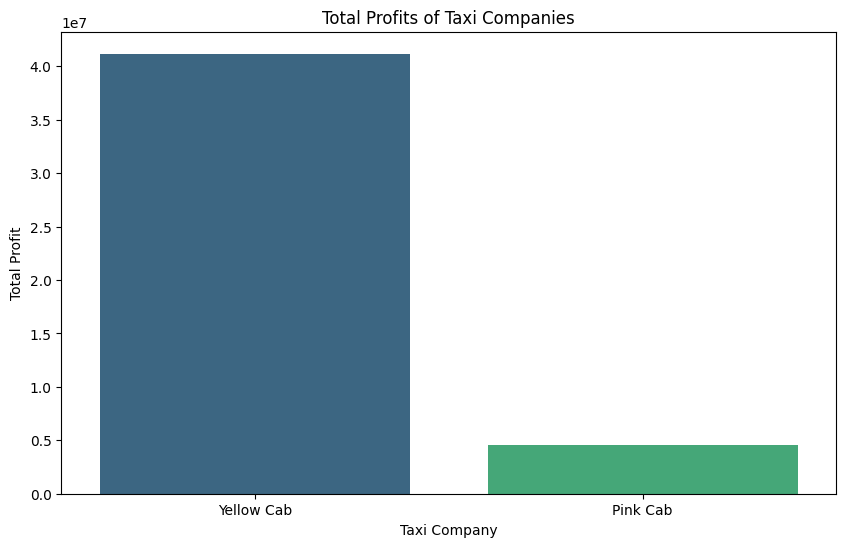

In [6]:
company_profit = df.groupby('Company')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=company_profit.index, y=company_profit.values, palette='viridis')
plt.title('Total Profits of Taxi Companies')
plt.ylabel('Total Profit')
plt.xlabel('Taxi Company')
plt.show()

------------------------

## Which demographic group uses taxis more often?

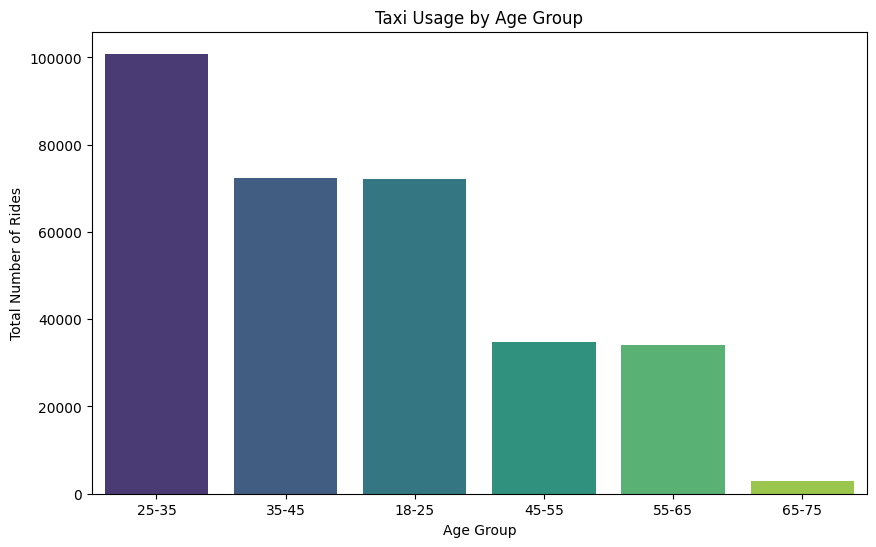

In [7]:
demographic_usage = df.groupby('Age Group')['Transaction ID'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=demographic_usage.index, y=demographic_usage.values, palette='viridis')
plt.title('Taxi Usage by Age Group')
plt.ylabel('Total Number of Rides')
plt.xlabel('Age Group')
plt.show()

----------------------------

## Which taxi company is more popular in which city?

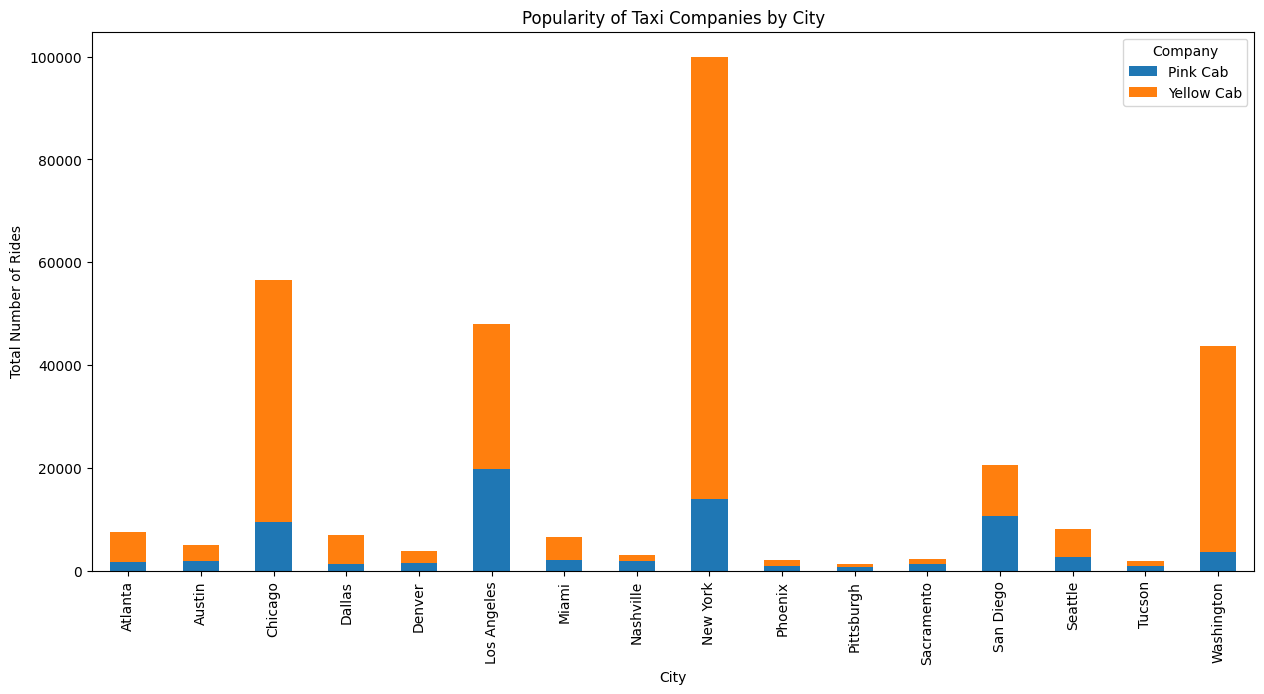

In [8]:
city_company_popularity = df.groupby(['City', 'Company'])['Transaction ID'].count().unstack()

city_company_popularity.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Popularity of Taxi Companies by City')
plt.ylabel('Total Number of Rides')
plt.xlabel('City')
plt.show()

-----------------

## Which age group uses taxis the most?

In [9]:
demographic_usage = df.groupby('Age Group')['Transaction ID'].count()
highest_usage_age_group = demographic_usage.idxmax()
highest_usage = demographic_usage.max()

highest_usage_age_group, highest_usage


('25-35', 100850)

-----------------

##  In which city is the Pink Cab company more popular than the Yellow Cab company?

In [10]:
city_company_popularity = df[df['Company'] == 'Pink Cab'].groupby('City')['Transaction ID'].count()
city_yellow_popularity = df[df['Company'] == 'Yellow Cab'].groupby('City')['Transaction ID'].count()

cities_where_pink_more_popular = city_company_popularity[city_company_popularity > city_yellow_popularity].index.tolist()
cities_where_pink_more_popular


['Nashville', 'Pittsburgh', 'Sacramento', 'San Diego']

------------------

## Which payment mode is more popular among customers?

In [11]:
payment_mode_popularity = df.groupby('Payment_Mode')['Transaction ID'].count()
most_popular_payment_mode = payment_mode_popularity.idxmax()
number_of_transactions = payment_mode_popularity.max()

most_popular_payment_mode, number_of_transactions


('Card', 190091)

-------------------------

## Which gender predominates in taxi usage?

In [12]:
gender_usage = df.groupby('Gender')['Transaction ID'].count()
predominant_gender = gender_usage.idxmax()
gender_usage_count = gender_usage.max()

predominant_gender, gender_usage_count


('Male', 182962)

--------------------

## During which months do people use taxis the most?

In [13]:
df['Month'] = pd.to_datetime(df['Date of Travel']).dt.month
month_usage = df.groupby('Month')['Transaction ID'].count()
peak_month = month_usage.idxmax()
peak_month_usage = month_usage.max()

peak_month, peak_month_usage


(12, 41649)

--------------------------

## In which city is taxi usage the least?

In [14]:
city_usage = df.groupby('City')['Transaction ID'].count()
least_used_city = city_usage.idxmin()
city_usage_count = city_usage.min()

least_used_city, city_usage_count


('Pittsburgh', 1313)

---------------------

# Conclusion

## By closely examining taxi usage patterns, demographic preferences, and company ratings, XYZ company can make informed decisions about their investments in the taxi industry. The data-driven insights provided above offer a comprehensive understanding of current market dynamics.